# Metar plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy import feature as cfeature

### Open saved metar dataframe

In [2]:
met_df = pd.read_pickle('metar_20190801_df.pkl')

### Limiting to highest gusts
Finding situations where wind gust is greater than 15.6 m/s. "Moderate Risk" for general populace, higher risk for aviation. 

In [3]:
filtered_values = np.where((met_df['MetWindGust']>=15.6))
high_gust = met_df.loc[filtered_values]

### Making metar plots
One at a time, saved in folder. 

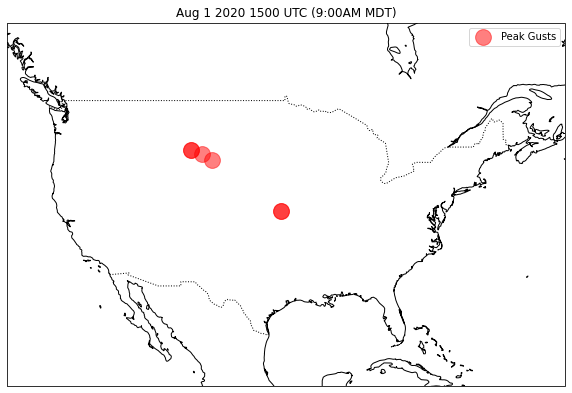

In [4]:
fig = plt.figure(figsize=(10, 10), facecolor='w')
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

plt.scatter(high_gust.Longitude, high_gust.Latitude, c='Red', alpha=0.5,
             vmin=0, vmax=50, s=250, label='Peak Gusts', transform=ccrs.PlateCarree())

plt.title('Aug 1 2020 1500 UTC (9:00AM MDT)')
plt.legend()
plt.show()

# HRRR plots

### Open saved hrrr dataframe

In [5]:
hrrr_df = pd.read_pickle('hrrr_20190801_df.pkl')

### Limiting to highest gusts

In [6]:
filtered_values = np.where((hrrr_df['WindGust']>=15.6))
hrrr_gust_high = hrrr_df.loc[filtered_values]

### Making HRRR plots

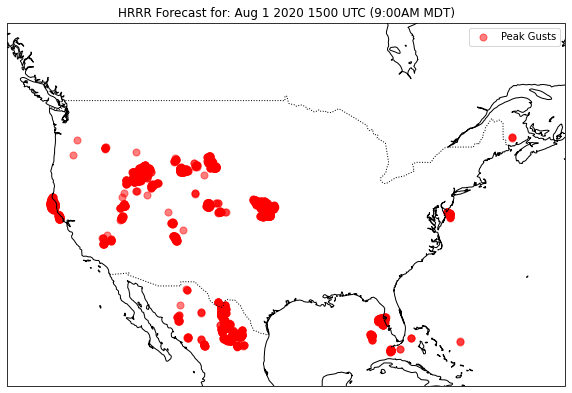

In [7]:
fig = plt.figure(figsize=(10, 10), facecolor='w')
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

plt.scatter(hrrr_gust_high.Longitude, hrrr_gust_high.Latitude, c='Red', alpha=0.5,
             vmin=0, vmax=50, s=50, label='Peak Gusts', transform=ccrs.PlateCarree())

plt.title('HRRR Forecast for: Aug 1 2020 1500 UTC (9:00AM MDT)')
plt.legend()
plt.show()

### Evaluating HRRR performance

Possibly add lookup table here to get RMSE for individual days. 

# Neural network top gusts
Needs to be built and loaded